In [1]:
import os
import config
from data_loader import *

# Print current working directory
print(f"Current working directory: {os.getcwd()}")

# Verify file path
file_path = config.DATA_PATH
print(f"Config file path: {file_path}")

# Check if the dataset file exists
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"Error: The dataset file was not found at {file_path}")

# Load and preprocess data
X_raw, y = load_data(file_path)


# Print confirmation
print(f"Data Loaded: X shape = {X_raw.shape}, y shape = {y.shape}")
print("\nTop 5 rows of X_raw:")
print(X_raw.head())

print("\nTop 5 rows of y:")
print(y.head())



# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = split_data(X_scaled, y)

# # Build and train the model
# model = build_model(X_train.shape[1])
# train_model(model, X_train, y_train)

# # Evaluate the model on the test set
# loss, mae = evaluate_model(model, X_test, y_test)

# # Make predictions for evaluation metrics and visualization
# y_pred = model.predict(X_test)

# # Calculate metrics and plot predictions
# metrics = calculate_metrics(y_test.values.flatten(), y_pred.flatten())
# print(metrics)

# plot_predictions(y_test.values.flatten(), y_pred.flatten())


Current working directory: C:\Users\samee\Untitled Folder 1
Config file path: C:\Users\samee\Desktop\ML Engineer project\MLE-Assignment.csv
Data Loaded: X shape = (500, 448), y shape = (500,)

Top 5 rows of X_raw:
          0         1         2         3         4         5         6  \
0  0.416181  0.396844  0.408985  0.372865  0.385293  0.365390  0.355226   
1  0.415797  0.402956  0.402564  0.396014  0.397192  0.389634  0.375671   
2  0.389023  0.371206  0.373098  0.373872  0.361056  0.349709  0.333882   
3  0.468837  0.473255  0.462949  0.459335  0.461672  0.459824  0.458194   
4  0.483352  0.487274  0.469153  0.487648  0.464026  0.451152  0.458229   

          7         8         9  ...       438       439       440       441  \
0  0.343350  0.344837  0.361567  ...  0.680883  0.710280  0.717482  0.715078   
1  0.363689  0.373883  0.359674  ...  0.701600  0.684011  0.697271  0.701995   
2  0.330841  0.328925  0.323854  ...  0.671400  0.683054  0.669286  0.663179   
3  0.427737  0.

In [2]:
# EDA
print(generate_summary_statistics(X_raw, y))

     count      mean       std       min       25%       50%       75%  \
0    500.0  0.443118  0.044719  0.311182  0.410456  0.449105  0.480245   
1    500.0  0.440761  0.045520  0.295321  0.404310  0.442651  0.478822   
2    500.0  0.433814  0.045764  0.284064  0.397038  0.434215  0.473158   
3    500.0  0.426122  0.046070  0.282054  0.389029  0.425074  0.464947   
4    500.0  0.418990  0.045405  0.296702  0.382102  0.417075  0.459232   
..     ...       ...       ...       ...       ...       ...       ...   
443  500.0  0.739850  0.053487  0.575259  0.701690  0.744004  0.775698   
444  500.0  0.738738  0.053601  0.571767  0.700638  0.743965  0.775686   
445  500.0  0.738298  0.054014  0.577803  0.698655  0.743301  0.775621   
446  500.0  0.737599  0.054136  0.576985  0.698107  0.745216  0.774635   
447  500.0  0.738099  0.054297  0.562302  0.699673  0.745733  0.774310   

          max  target_corr  
0    0.556287    -0.072485  
1    0.530168    -0.067926  
2    0.528774    -0.0788

In [ ]:
handle_missing_data(X_raw, strategy='mean')

In [ ]:
X_scaled = preprocess_data(X_raw)
print(f"Preprocessed Data Shape: {X_scaled.shape}")

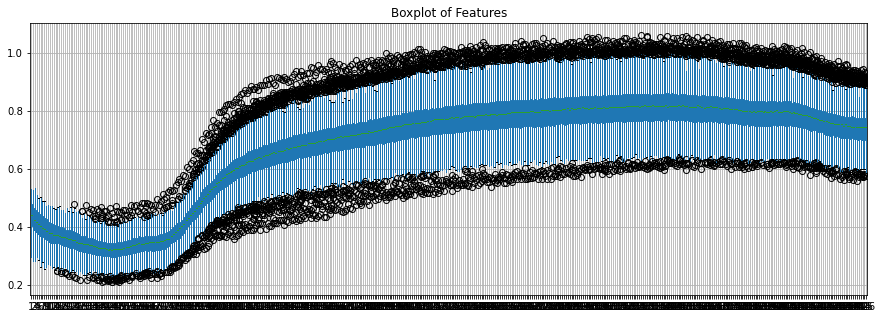

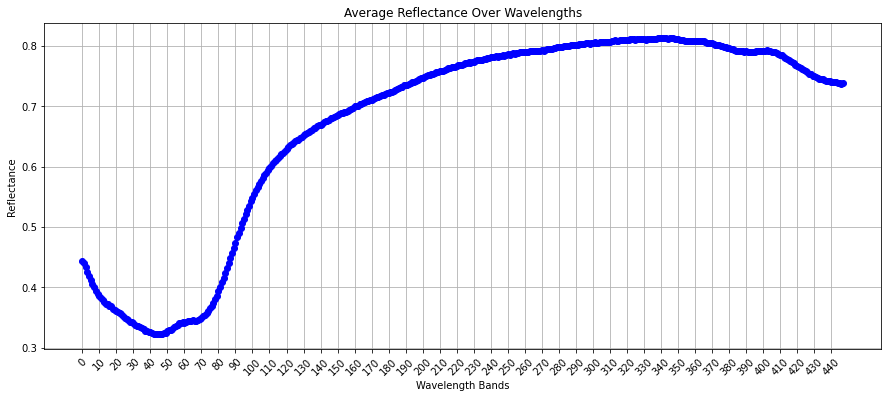

In [3]:
plot_boxplots(X_raw)
plot_spectral_reflectance(X_raw)

Preprocessed Data Shape: (500, 448)


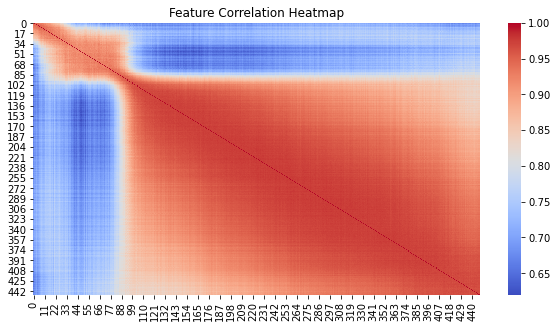

In [5]:
plot_sample_heatmap(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383
